Digite o número da geração na qual deve-se encerrar o algoritmo
10000
Melhor caminho é :[33, 73, 27, 44, 17, 85, 23, 31, 1, 53, 40, 94, 69, 54, 37, 64, 0, 71, 3, 29, 51, 88, 78, 50, 93, 68, 16, 7, 2, 39, 60, 26, 81, 43, 12, 47, 24, 70, 21, 46, 75, 45, 83, 34, 77, 11, 59, 19, 56, 57, 62, 84, 38, 79, 76, 80, 99, 90, 86, 63, 95, 8, 96, 48, 97, 58, 4, 15, 32, 49, 25, 42, 36, 18, 89, 9, 14, 6, 98, 5, 13, 82, 41, 74, 28, 35, 91, 22, 30, 87, 61, 67, 55, 66, 20, 72, 65, 52, 10, 92] com a distância de 4016.636393539544 metros


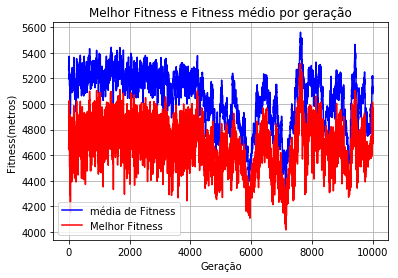

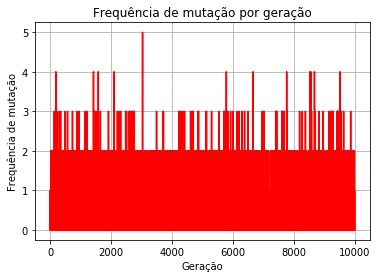

In [2]:

import math;
import matplotlib.pyplot as plt;
import random;
%matplotlib inline

#criando uma lista de coordenadas x das cidades
cordX= [int(a) for a in list(filter(lambda x: x!="\n" ,open("coordenadasx.dat","r",encoding="utf-8").readlines()))];
#criando uma lista de coordenadas Y das cidades
cordY= [int(a) for a in list(filter(lambda x: x!="\n" ,open("coordenadasy.dat","r",encoding="utf-8").readlines()))];
#Juntando as coordenas x e y para criar uma nova lista de cidades. Func zip cria nova lista a partir de outras duas
cord=list(zip(cordX,cordY));

#dicionário que guardará as distâncias de todas as cidades que serão pré-calculadas logo no inicio do programa
Distcidades={}
#2 laços para prencher o dicionário.
# os laços terão duas variaveis a,b que irão iterar pelo dicionário até a ultima posição.
#o valor de a se inicia em 0 e o valor inicial de b é a+1.
#a escolha dessa forma de preencher o dicionário é para que o número de repetições e elementos no dicionário seja (n*(n-1))/2
#para que assim seja feito o processo sem precisar refazer calculos já feitos
for a in range(0, len(cord)):
    for b in range(a+1,len(cord)):
        #pontos[a,b]=lista de cidades que serão usadas para criar tuplas de busca de distâncias
        #no dicionário.
        pontos=[a,b];
        pontos.sort();#ordenar para que o menor número sempre esteja na frente
        #[a,b] num diconário faz com que adicione uma tupla como chave e torne mais facil e rápido encontrar  valor desejado
        Distcidades[a,b]=math.sqrt(pow((cord[(pontos[1])][0]-cord[(pontos[0])][0]),2)+pow((cord[(pontos[1])][1]-cord[(pontos[0])][1]),2))
        #distcidades=distância euclidiana entre as cidades a e b
        
#classe para guardar as informações importantes de cada geração
class Geracao():
    def __init__(self, sequencia, fitness, fitmed,txMutacao):
        self.sequencia=sequencia;#melhor combinação/sequencia
        self.fitness=fitness;#seria a distância total do melhor caminho/combinação/sequência
        self.fitmed=fitmed;#fitness total da geração. soma da distância de todos os caminhos
        self.taxaMutacao=txMutacao;
        
#classe população
class Populacao():
    #método para pegar os as distâncias entre cidades do dicionário
    def PegarDist(self,cid1,cid2):
        Ncidades=[];#vetor de cidades
        Ncidades=[cid1,cid2];#colocando as cidades num vetor para poder organizar
        Ncidades.sort();#ordenando para que a cidade com menor número identificador fique sempre na frente
        
        return (Distcidades[Ncidades[0],Ncidades[1]]);#retornando o valor do dicionário para àquelas cidades
    
    #método para gerar população inicial. Vai permutar e criar as combinações
    def GerarPopInicial(self):
        #loop para criar a quantidad de combinações desejadas
        for x in range(0,self.populacaoInicial):
            seqTemp=[];#criando uma lista vazia que será usada para guardar a combinação
            #criando lista com quantidade de elementos desejada. Essa quantidade é informada na hora de instanciar uma população
            coordenadas=[a for a in range(0,self.quantidadeElSeq)];
#coordenadas seria a representação númerica de cada cidade
            
            '''laço para preencher a lista"seqTemp". enquanto ele é feito ele sorteia um elemento da lista de elementos disponíveis, coloca na lista
             adiciona na lista temporária,em seguida apaga da lista de elementos disponíveis, e ao final adiciona na populacao
            
            '''
            #loop para criar a permutação entre cidades
            while(len(coordenadas)>0):
                elemento=random.choice(coordenadas)
                seqTemp.append(elemento);
                coordenadas.remove(elemento);
                
            self.populacao.append(seqTemp);
    
    #método para preencher a lista fitness com a distância total do caminho/combinação de cidades. Método para calcular a função objetivo(distância caminho)
    def Avaliar(self):
        seqFit=[];#variavel temporária que armazenará os tamanhos dos caminhos
        for a in self.populacao:
            fitSeq=0;
            
            for b in range(0,len(a)-1):
                fitSeq+=self.PegarDist(a[b],a[(b+1)]);#calculo da distância euclidiana de uma cidade para a próxima da sequência
            #adicionando o tamanho do caminho numa lista
            seqFit.append(fitSeq);
        #atribuindo a lista de tamanhos a variavel de classe fitness, que guardará as distâncias, tamanhos de todos os caminhos
        self.fitness=seqFit;
        self.AddGeracao();#guardando informações na lista da gerações
    
    #método para adicionar as informações referentes a melhorfitnes, media de fitness
    #sequência do melhor fitness
    def AddGeracao(self):
        #pegando o melhor fitness. Nesse caso, como é distância, pega-se a menor distância
        melhorFitness=min(self.fitness);
        #pegando o id de onde se encontra a melhor distância. ele será usado para pegar a sequência
        IdMelhorFitness=self.fitness.index(melhorFitness);
        #variavel auxiliar que guardará os elementos do melhor caminho 
        sequencia=[a for a in self.populacao[IdMelhorFitness]];
        #adicionando as informações da geração(melhor fitness, sequencia, fitness medio) a uma lista.
        self.geracao.append((Geracao(sequencia,melhorFitness,sum(self.fitness)/self.populacaoInicial,self.txMut)));
        if(melhorFitness<self.melhorfitness):
            self.melhorfitness=melhorFitness;
            self.melhorcombinacao=sequencia;
            self.germelhorcomb=len(self.geracao);
            
    
    #seleção por roleta
    def Selecionar(self):
        
        #somando o total das porcentagens do valor do fit
        #somporfit é a variavel que vai guardar o valor do total de porcentagens dos fitness
        SomPorFit=sum([1/a for a in self.fitness]);
        porFit=[(1/a)/SomPorFit for a in self.fitness];#calculando e guardando numa lista o fitness,grau de aptidão em % para cada caminho
        novaPopulacao=[];
       # print(porFit);
        for a in range(0,self.populacaoInicial):
            #simulando o rolar roleta com um número aleatório
            valorRoleta=random.random();
           # print(valorRoleta);
            SomaPorc=0;#
            for indice,valorPor in list(enumerate(porFit)):
                SomaPorc+=valorPor;
                if(SomaPorc>=valorRoleta):
                    selecionado=self.populacao[indice];
                    novaPopulacao.append([x for x in selecionado]);
                    break;
                   
        
        
        self.populacao=novaPopulacao;
    #método para fazer os sorteios de pares de pais   
    def EscolherPais(self):
        #lista com os possíves pais
        pais=[([b for b in a]) for a in self.populacao];
        casal=[]#criando lista para guardar oos casais
        for a in range(0,int(self.populacaoInicial/2)):
            par=[];#variavel auxiliar para guardar o par e depois aplicar na lista de casais
            #loop para montar os casais. e sempre que escolhe um pai, ele é removido dos possiveis pais
            #para que assim não se repita
            for b in range(0,2):
                par.append(random.choice(pais));
                pais.remove(par[b]);
                
            casal.append(par);
        #random.shuffle(pais);
        pais=[];
        for a,b in casal:
            pais.append(a);
            pais.append(b);
            
        self.populacao=pais;
            
        
        #método de mutação, Reciprocal Exchange troca valores de 2 pontos selecionados aleatoriamente
        #chancemutacao é a variavel responsavel para indicar a probabilidade de haver mutação
    def Mutacao(self,chanceMutacao):
        self.txMut=0;#zerando o contador de mutações
       #iterando a lista população para verificar e aplicar mutação 
        for a in self.populacao:
            RandMut=random.random();#Sorteando de 0 a 1 para ver se vai haver mutação.
            #caso o numero aleatório seja menor ou igual a chance de mutaçao, então há mutação
            if(RandMut<=chanceMutacao):
                self.txMut+=1;#caso haja mutação, incremente o contador de mutações
               # print("mutacao caminho = %r"%(a))
                indicescidades=list(range(0,self.quantidadeElSeq));
                pontos=[];#pontos selecionados para mutação
                #fazendo um loop em conjunto do random.choice para pegar os locais de mutação
                for b in range(0,2):
                    pontos.append(random.choice(indicescidades));
                    indicescidades.remove(pontos[b]);
                    
               # print("pontos mutação = %r"%(pontos));
                #usando variavel auxiliar para guardar o valor de uma das variaveis
                #para assim haver a troca de valores entre as variaveis
                aux=a[(pontos[0])];
                a[(pontos[0])]=a[(pontos[1])];
                a[(pontos[1])]=aux;
                
        
        
        
   #método de crossover. ele vai combinar dois sequências/combinações pais para gerar duas novas 
    # Order Operator (OX) 
    def Crossover(self):
        
        #formando os casais. eles ficarão próximos e será possivel utilizá-los percorrendo em 2 steps
        self.EscolherPais();
        #print("crossover");
       
        #criando copia da população para poder criar os filhos através do crossover
        filhos=[[b for b in a]for a in self.populacao]
        
        #percorrendo a lista em par para representar os casais.
        for a in range(0,self.populacaoInicial,2):
            
            indices=[b for b in range(1,self.quantidadeElSeq-2)];#criando uma lista para gerar os pontos de cortes
            pontos=[];#lista para armazenar os 2 pontos de cortes
            
            '''usando o random.choice para pegar um elemento dos indices de pontos de cortes e assim em seguida
            excluí-lo da lista de indices para que não corra o risco de ele ser escolhido novamente
            '''
            for c in range(0,2):
                pontos.append(random.choice(indices));
                indices.remove(pontos[c])
                
            
            pontos.sort();#ordenando a lista de pontos de cortes para que o menor sempre fique a esquerda
            #print(pontos);#imprimindo os pontos de corte
            
            '''gerando uma lista a partir do segundo pai que não possui os elementos do pai 1
            que estão entre os pontos de corte'''
            corte1=list(filter(lambda x:x not in (filhos[a])[(pontos[0]):(pontos[1])+1] ,filhos[a+1]));
            '''gerando uma lista a partir do primeiro pai que não possui os elementos do pai 2
            que estão entre os pontos de corte'''
            corte2=list(filter(lambda x:x not in (filhos[a+1])[(pontos[0]):(pontos[1])+1] ,filhos[a]));
            
            #fazendo o crossover
            '''para isso percorre-se as sequencias que representam os pais e alteram os valores fora dos pontos de corte
            por novos valores vindo de uma lista que já teve os elementos do outro pai filtrados
            '''
            #o loop que vai percorrer a populacao, ignorará os elementos dentro do intervalo dos pontos 0 e 1
            #e fora disso, adicionará os elementos exclusivos logo do inicio, e em seguida deletar o elemento
            #da lista para que não seja adicionado novamente
            for b in range(0,self.quantidadeElSeq):
                if(b>=pontos[0] and b<=pontos[1]):
                    continue;
                
                (filhos[a])[b]=corte1[0];
                del(corte1[0]);
                (filhos[a+1])[b]=corte2[0];
                del(corte2[0]);
                
            #fazendo com que a nova população( de filhos) seja adicionada a lista da população
            self.populacao=filhos;
    
    def __init__(self,tamPopIni,Nger,QelSeq):
        self.populacaoInicial=tamPopIni;#tamanho da população inicial
        self.Ngeracoes=Nger;#Numero de gerações ou loops que o programa vai fazer. Uma das condições de termino
        self.quantidadeElSeq=QelSeq;#quantidade de elementos que vão haver em cada combinação/sequencia
        self.populacao=[];#lista para guardar as combinações
        self.fitness=[];#lista para guardar a distância total de cada sequencia/combinação
        self.geracao=[];#lista para guardar as informações das gerações
        self.txMut=0;#variavel que guardará o valor da taxa de mutação da geração atual
        self.melhorfitness=100000;#variavel para guardar o melhor fitness da população
        self.melhorcombinacao=[];#variavel par a guardar o melhor caminho ou combinação da população
        self.germelhorcomb=0;#variavel que determina a geração do melhor caminho

ngeracao=int(input("Digite o número da geração na qual deve-se encerrar o algoritmo\n"))
pop=Populacao(50,ngeracao,100);#criando uma população/instanciando uma população
pop.GerarPopInicial();#gerando população inicial/ ou criando as combinações
#print("depois de gerar")
#print([a for a in pop.populacao])
pop.Avaliar();#calculando o fitness

#loop para treinar a população até certa geração
for a in range(0,pop.Ngeracoes):
    pop.Selecionar();#selecionando a nova população
    
    
    pop.Crossover();#fazendo combinação entre individuos
    #método de mutação
    
    pop.Mutacao(0.01);
    
#função de avaliação
    pop.Avaliar();
    
    
print("Melhor caminho é :%r com a distância de %r metros"\
      %(pop.melhorcombinacao,pop.melhorfitness));
    #print([a.fitmed for a in pop.geracao]);
# gráficos de 3 tipos de fitness das gerações
plt.figure(1);
plt.title("Melhor Fitness e Fitness médio por geração");
plt.grid();
plt.plot(list(range(0, len(pop.geracao))),[a.fitmed for a in pop.geracao],'b',list(range(0, len(pop.geracao))),[a.fitness for a in pop.geracao],'r');
plt.xlabel("Geração");
plt.ylabel("Fitness(metros) ");
plt.gca().legend(('média de Fitness','Melhor Fitness'));
plt.show();

#gráfico que mostra a taxa de mutação de cada geração
plt.figure(2);
plt.title("Frequência de mutação por geração");
plt.grid();
plt.plot(list(range(0, len(pop.geracao))),[a.taxaMutacao for a in pop.geracao],'r');
plt.xlabel("Geração");
plt.ylabel("Frequência de mutação");
plt.show();






#print(sum(pop.fitness)/pop.populacaoInicial)#print de teste para verificar o fitness